# Data Science Lab - 5
### Karthik Bommaraju
### 207166
### Section - B

# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [2]:
def normalize(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    return (X - X_mean) / X_std

In [3]:
class Random_Data:
    def __init__(self, size, noise_std):
        self.size = size
        self.noise_std = noise_std
    def generate_linear_data(self):
        weights = np.random.uniform(-1, 1, size=(2, 1))
        X = np.random.uniform(0, 100, size=(self.size, 1))
        X_norm = normalize(X).reshape(X.shape[0], 1)
        X_norm = np.concatenate([np.ones((self.size, 1)), X_norm], axis=1)
        y = (X_norm @ weights) + np.random.normal(scale=self.noise_std, size=self.size).reshape(-1, 1)
        return X, y
    def data(self):
        return self.generate_linear_data()

In [4]:
def train_test_split(X, y, test_size=None, train_size=None):
    if test_size is None and train_size is None:
        test_size = 0.25
    if train_size is None:
        train_size = 1 - test_size
    arr_rand = np.random.rand(len(X))
    mask = arr_rand < np.percentile(arr_rand, int(train_size * 100))
    X_train = X[mask]
    y_train = y[mask]
    X_test = X[~mask]
    y_test = y[~mask]
    return X_train, X_test, y_train, y_test

In [5]:
class LinearRegression:
    def __init__(self, X, y, alpha=1e-2, reg=None, lambda_reg=1.0):
        self.X = X
        self.X_norm = np.insert(normalize(X).reshape(-1, 1), 0, 1, axis=1)
        self.y = y.reshape(-1, 1)
        self.alpha = alpha
        self.reg = reg
        self.lambda_reg = lambda_reg
        self.Theta = np.ones(shape=(2, 1), dtype='float64')
        self.m = len(X)
    def reg_term(self, theta):
        if self.reg is None:
            return np.zeros(theta.shape)
        if self.reg == 'l1':
            lasso_reg_term = (self.lambda_reg / self.m) * np.sign(theta)
            lasso_reg_term[0] = 0
            return lasso_reg_term
        ridge_reg_term = (self.lambda_reg / self.m) * theta
        ridge_reg_term[0] = 0
        return ridge_reg_term
    def batch_gradient_descent(self, num_iter):
        iterations = 0
        while iterations < num_iter:
            loss_derivative = (self.X_norm.T @ ((self.X_norm @ self.Theta) - self.y)) / self.m
            loss_derivative += self.reg_term(self.Theta) 
            if np.linalg.norm(loss_derivative) < 1e-5:
                break
            self.Theta = self.Theta - (self.alpha * loss_derivative)
            iterations += 1
        print('Iterations: ', iterations)
    def predict(self, X):
        X_norm = np.insert(normalize(X).reshape(-1, 1), 0, 1, axis=1)
        y = X_norm @ self.Theta
        return y
    def plot(self, X, y):
        sns.scatterplot(x=X, y=y)
        plt.plot(X, self.predict(X), color='red')
        plt.show()
    def weight_vector(self):
        print(self.Theta)
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        SS_tot = ((y_test - np.mean(y_test)) ** 2).sum()
        SS_res = ((y_test - y_pred) ** 2).sum()
        r2_score = 1 - SS_res / SS_tot
        return r2_score

In [8]:
X, y = Random_Data(500, 0.5).data()
X.shape

(500, 1)

In [7]:
X[:5]

array([[69.08922939],
       [68.83442441],
       [53.17603603],
       [28.58124937],
       [85.98753104]])

In [8]:
y[:5]

array([[ 0.43397678],
       [-0.14689802],
       [-1.05397456],
       [-1.21709013],
       [ 1.11457166]])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [10]:
X_train[:5]

array([[69.08922939],
       [68.83442441],
       [53.17603603],
       [28.58124937],
       [85.98753104]])

In [11]:
X_test[:5]

array([[ 0.14117434],
       [80.26953581],
       [53.64322494],
       [53.93245824],
       [61.97098646]])

In [12]:
y_train[:5]

array([[ 0.43397678],
       [-0.14689802],
       [-1.05397456],
       [-1.21709013],
       [ 1.11457166]])

In [13]:
y_test[:5]

array([[-1.10731697],
       [ 0.64690159],
       [ 0.55059568],
       [-0.36111534],
       [-0.43781944]])

<AxesSubplot:>

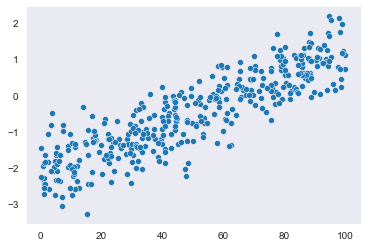

In [14]:
sns.scatterplot(x=X_train.reshape(-1), y=y_train.reshape(-1))

In [15]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((500, 1), (500, 1), (400, 1), (100, 1), (400, 1), (100, 1))

### No Regularization

In [16]:
lin_reg = LinearRegression(X_train, y_train, alpha=1e-1)

In [17]:
lin_reg.batch_gradient_descent(num_iter=1000)

Iterations:  114


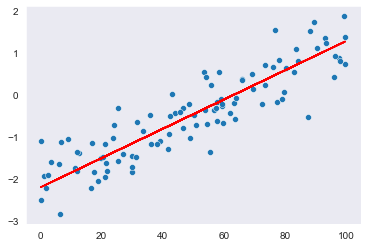

In [18]:
lin_reg.plot(X_test.reshape(-1), y_test.reshape(-1))

In [19]:
print(lin_reg.score(X_test, y_test))

0.7923185367464944


### Lasso Regularization

In [20]:
lin_reg_lasso = LinearRegression(X_train, y_train, alpha=1e-1, reg='l1', lambda_reg=15)

In [21]:
lin_reg_lasso.batch_gradient_descent(num_iter=1000)

Iterations:  114


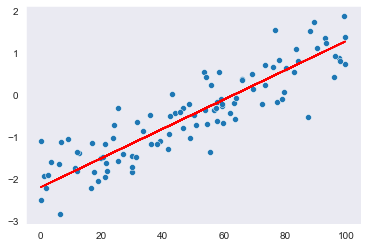

In [22]:
lin_reg_lasso.plot(X_test.reshape(-1), y_test.reshape(-1))

In [23]:
print(lin_reg_lasso.score(X_test, y_test))

0.7923287083372725


### Ridge Regularization

In [24]:
lin_reg_ridge = LinearRegression(X_train, y_train, alpha=1e-1, reg='l2', lambda_reg=15)

In [25]:
lin_reg_ridge.batch_gradient_descent(num_iter=1000)

Iterations:  114


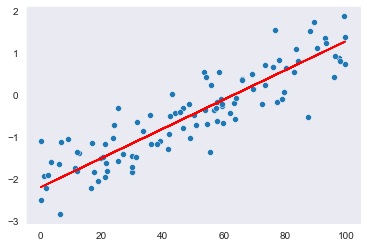

In [26]:
lin_reg_ridge.plot(X_test.reshape(-1), y_test.reshape(-1))

In [27]:
print(lin_reg_ridge.score(X_test, y_test))

0.7923287086758863
